# INTRODUCTION TO MACHINE LEARNING

In [1]:
# approaches to machine learning
#1.Supervised learning
#2.Unsupervised learning
#3.Reinforcement learning

#Problem formulation!
#Define the problem! Classification Task,Regression Analysis,Clustering ,anomally detection recommendation
#2.Gather the data
#3.split the data

#DATA TYPES
#1.categories
#2.Numerical data can de discrete(Intergers)or continuous (Infinite values)



In [2]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\marble pc\anaconda3\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, scikit-learn-intelex
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np # linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #plotting/data visualization
import seaborn as sns # statistical data


#MLfor Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# control display
pd.options.display.max_columns=50
sns.set(style="darkgrid",rc={'axes.facecolor':'#CAF1DE'})

#ignore warning
#import warnings
#warning.filterwarnings('igonre')

In [4]:
df=pd.read_csv("heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
"""summary
cp=chest pain
trestbps=resting blood pressure
chol=cholesterol
fbs=fasting blood sugar
restecg=resting electrocardiography
exang=exercise induced agina
old peak= ST depression induced
slope=the slope of the peak exercise
ca = number of major vessel
thal=normal,fexied defect ,reversible defect
target=have disease or not(1=yes,0=no)
"""

'summary\ncp=chest pain\ntrestbps=resting blood pressure\nchol=cholesterol\nfbs=fasting blood sugar\nrestecg=resting electrocardiography\nexang=exercise induced agina\nold peak= ST depression induced\nslope=the slope of the peak exercise\nca = number of major vessel\nthal=normal,fexied defect ,reversible defect\ntarget=have disease or not(1=yes,0=no)\n'

In [6]:
# show people with heart disease
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [7]:
# show percentage of male and female
count_female=len(df[df.sex==0])
count_male=len(df[df.sex==1])
# show output
print('percentage of female patients:{:2f}%'.format(count_female/(len(df.sex))*100))
print('percentage of female patients:{:2f}%'.format(count_male/(len(df.sex))*100))

percentage of female patients:30.439024%
percentage of female patients:69.560976%


In [8]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


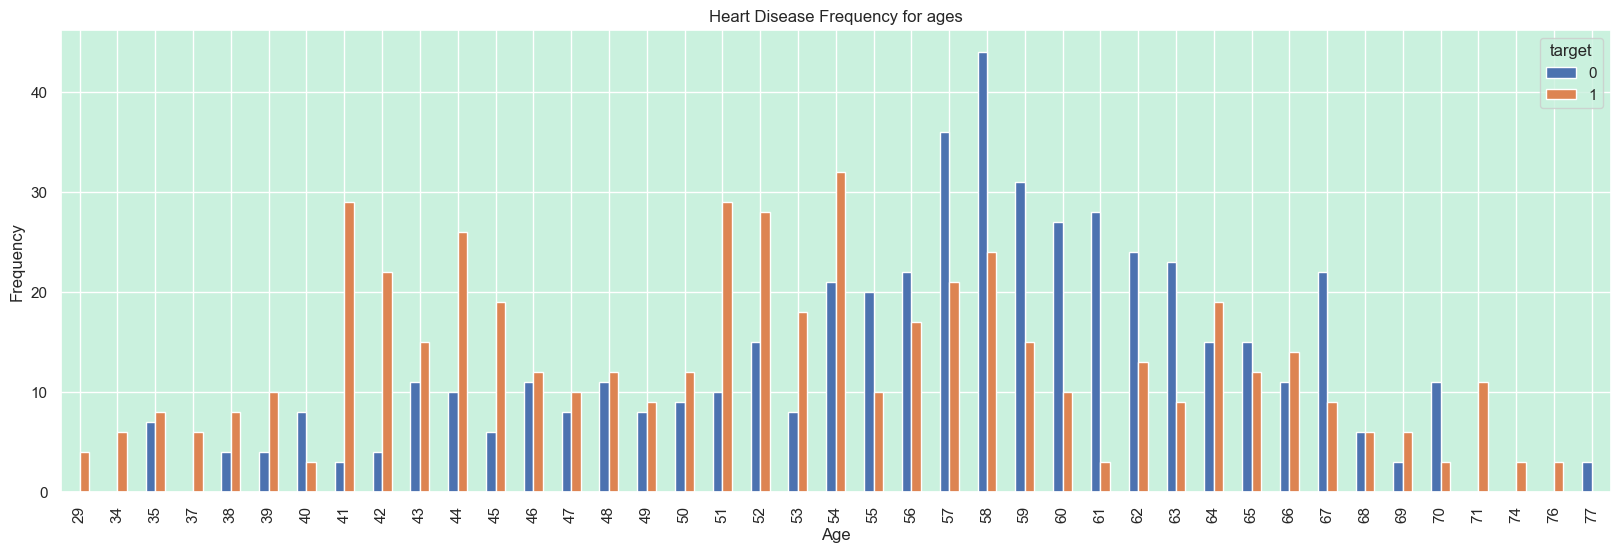

In [9]:
#barplot showing heart diseases frequency of age
pd.crosstab(df.age,df.target).plot(kind='bar',figsize=(20,6))
plt.title('Heart Disease Frequency for ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

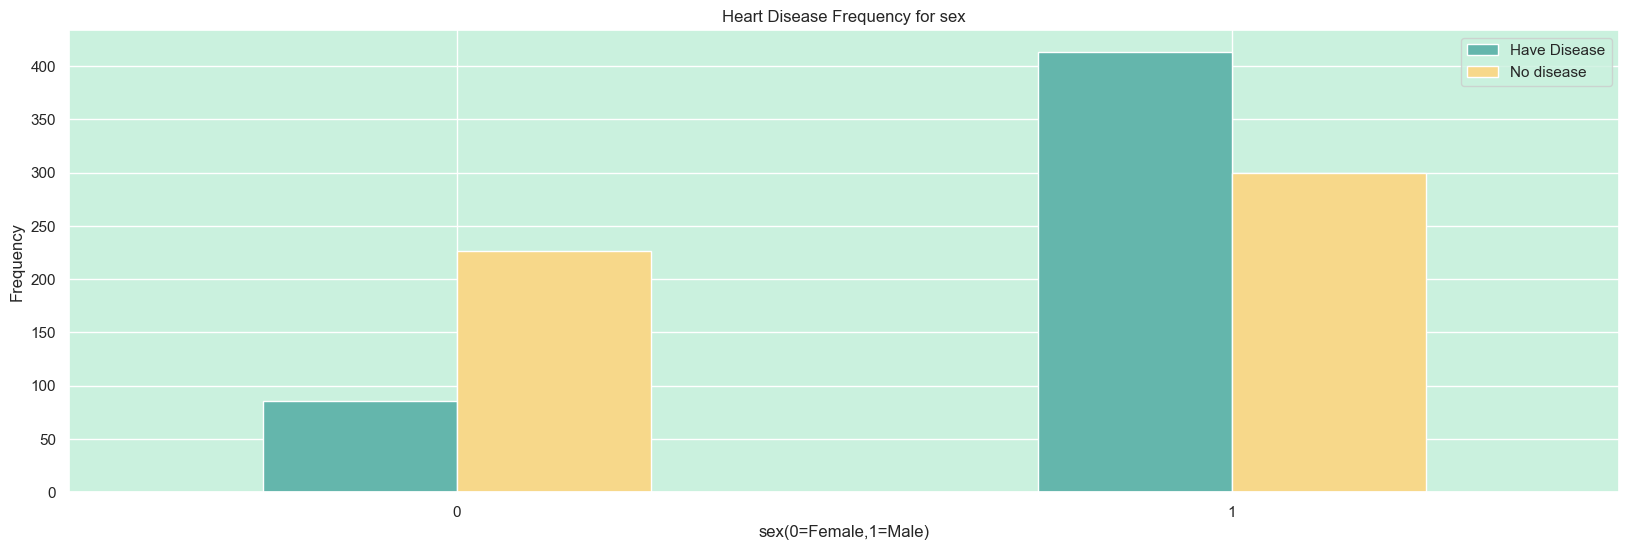

In [10]:
# data visualization of heart disease for sex
pd.crosstab(df.sex,df.target).plot(kind='bar',figsize=(20,6) ,color=['#64B6AC','#F7D88A'])
plt.title('Heart Disease Frequency for sex')
plt.legend(['Have Disease','No disease'])
plt.xlabel('sex(0=Female,1=Male)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

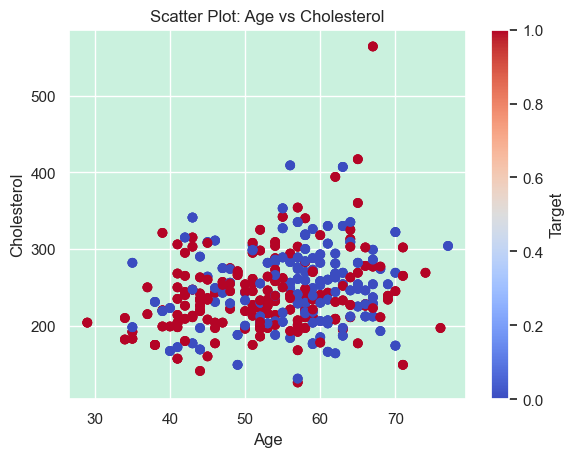

In [11]:
age = df['age']
chol = df['chol']

plt.scatter(age, chol, c=df['target'], cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot: Age vs Cholesterol')
plt.colorbar(label='Target')
plt.show()

In [12]:
#working with ML model Accuracy
#create model for Logistic Regression
#solve problems based on Classification. create independent variables
# categorical prediction


In [13]:
#create a model for Logistic Regression
# normalization of data
y=df.target.values
x_data=df.drop(['target'],axis=1)

In [14]:
#normalize the data! split data for training and testing
#80% training #20% testing
#normalize data x=(x-xmin)/(xmax-xmin)
x=(x_data-np.min(x_data))/ (np.max(x_data)- np.min(x_data))

C:\Users\MARBLE PC\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\MARBLE PC\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\MARBLE PC\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
#Logistic Regression,testing and Training ,dependent and independent variables
#decision trees


In [17]:
# Transpose matrices
x_train=x_train.T
y_train=y_train.T
x_test=x_test.T
y_test=y_test.T

In [18]:
# Train and Test
#divide data into subsets
#target data is always the dependent data(y)


In [19]:
# import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#let x be the independent variable(input feature) and y be the dependent variable
#store dependent variables i(target data)in Y.

#model training
model=LogisticRegression()
model.fit(x_train,y_train)

#Model evaluation


ValueError: Found input variables with inconsistent numbers of samples: [13, 820]

In [ ]:
import numpy
from sklearn import linear_model
x=numpy.array([1,2,3,4]).reshape(-1,1)
y=numpy.array([0,0,1,1])

logr=linear_model.LogisticRegression()
logr.fit(x,y)
#model evaluation

y_pred=logr.predict(numpy.array([3]).reshape(-1,1))
#accuracy=accuracy_score(numpy.array(y_pred))

#display results
print(y_pred)

In [ ]:
# Decision trees
#uses classification and regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
x_train,x_test,y_test=train_test_split(x,y,test)

#model training
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

#model evaluation
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)

#Display results
print('Accuracy:')